In [22]:
%matplotlib inline

# ImageContainer object

This tutorial shows how to use `squidpy.im.ImageContainer` to interact
with image structured data.

The ImageContainer is the central object in Squidpy containing the high
resolution images. It wraps `xarray.Dataset` and provides different
cropping, processing, and feature extraction functions.

::: seealso
For more details on specific `squidpy.im.ImageContainer` functions, have
a look at the following examples:

> -   [Interactive visualization with
>     Napari](../external_tutorials/tutorial_napari.ipynb).
> -   `sphx_glr_auto_tutorials_tutorial_image_container_zstacks.py`.
> -   `sphx_glr_auto_examples_image_compute_crops.py`.
> -   `sphx_glr_auto_examples_image_compute_show.py`.
:::


In [23]:
import squidpy as sq

import numpy as np

# Initialize ImageContainer

The `squidpy.im.ImageContainer` constructor can read in memory
`numpy.ndarray`/`xarray.DataArray` or on-disk image files. The
[ImageContainer]{.title-ref} can store multiple image layers (for
example an image and a matching segmentation mask).

Images are expected to have at least a [x]{.title-ref} and
[y]{.title-ref} dimension, with optional [channel]{.title-ref} and
[z]{.title-ref} dimensions. Here, we will focus on 2D images without at
[z]{.title-ref} dimension, see
`sphx_glr_auto_tutorials_tutorial_image_container_zstacks.py` for a
tutorial on how to use z-stacks with [ImageContainer]{.title-ref}.

Most important arguments upon initialization are:

> -   [img]{.title-ref} - the image.
> -   [layer]{.title-ref} - the name of the image layer.
> -   [dims]{.title-ref} - to specify the dimensions names of
>     [img]{.title-ref}.
> -   [lazy]{.title-ref} - set to True to allow lazy computations.
> -   [scale]{.title-ref} - set this to the scaling factor between the
>     image and the coordinates saved.

Let us see these arguments in action with a toy example.


In [24]:
arr = np.ones((100, 100, 3))
arr[40:60, 40:60] = [0, 0.7, 1]

print(arr.shape)
img = sq.im.ImageContainer(arr, layer="img1")
img

(100, 100, 3)


ImageContainer[shape=(100, 100), layers=['img1']]

In [25]:
arr

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

[img]{.title-ref} now contains one layer, [img1]{.title-ref}. The
default value of [dims]{.title-ref} expects the image to have dimensions
`y, x, channels` or `y, x, z, channels`. If the image has different
dimensions, you can specify another strategy or a tuple of dimension
names:


In [26]:
arr1 = arr.transpose(2, 0, 1)
print(arr1.shape)
img = sq.im.ImageContainer(arr1, dims=("channels", "y", "x"), layer="img1")
img

(3, 100, 100)


ImageContainer[shape=(100, 100), layers=['img1']]

In [27]:
arr1

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]])

# Add layers to ImageContainer

You can add image layers into the ImageContainer using
`squidpy.im.ImageContainer.add_img`.

The new layer has to share [x]{.title-ref}, [y]{.title-ref} (and
[z]{.title-ref}) dimensions with the already existing image. It can have
different channel dimensions. This is useful for add e.g., segmentation
masks.

By default, unique layer and channel dimension names are chosen, you can
specify them using the [layer]{.title-ref} and [dims]{.title-ref}
arguments.


In [28]:
arr_seg = np.zeros((100, 100))
arr_seg[40:60, 40:60] = 1

img.add_img(arr_seg, layer="seg1")
img

ImageContainer[shape=(100, 100), layers=['img1', 'seg1']]

For convenience, you can also assign image layers directly using the new
layer name:


In [29]:
img["seg2"] = arr_seg
img

ImageContainer[shape=(100, 100), layers=['img1', 'seg1', 'seg2']]

You can get a list of layers contained in an ImageContainer, and access
specific image-structured arrays using their names:


In [30]:
print(list(img))
img["img1"]

['img1', 'seg1', 'seg2']


<xarray.DataArray 'img1' (y: 100, x: 100, z: 1, channels: 3)>
array([[[[1., 1., 1.]],

        [[1., 1., 1.]],

        [[1., 1., 1.]],

        ...,

        [[1., 1., 1.]],

        [[1., 1., 1.]],

        [[1., 1., 1.]]],


       [[[1., 1., 1.]],

        [[1., 1., 1.]],

        [[1., 1., 1.]],
...
        [[1., 1., 1.]],

        [[1., 1., 1.]],

        [[1., 1., 1.]]],


       [[[1., 1., 1.]],

        [[1., 1., 1.]],

        [[1., 1., 1.]],

        ...,

        [[1., 1., 1.]],

        [[1., 1., 1.]],

        [[1., 1., 1.]]]])
Coordinates:
  * z        (z) <U1 '0'
Dimensions without coordinates: y, x, channels

Renaming of image layers is also possible using
`squidpy.im.ImageContainer.rename`:


In [31]:
img.rename("seg2", "new-name")

ImageContainer[shape=(100, 100), layers=['img1', 'new-name', 'seg1']]

# Visualization

Use `squidpy.im.ImageContainer.show` to visualize (small) images
statically. See `sphx_glr_auto_examples_image_compute_show.py` for more
details.

For large images and for interactive visualization of
`squidpy.im.ImageContainer` together with spatial \'omics data, we
recommend using `squidpy.im.ImageContainer.interactive`, which uses
Napari. See [Interactive visualization with
Napari](../external_tutorials/tutorial_napari.ipynb) for more details.


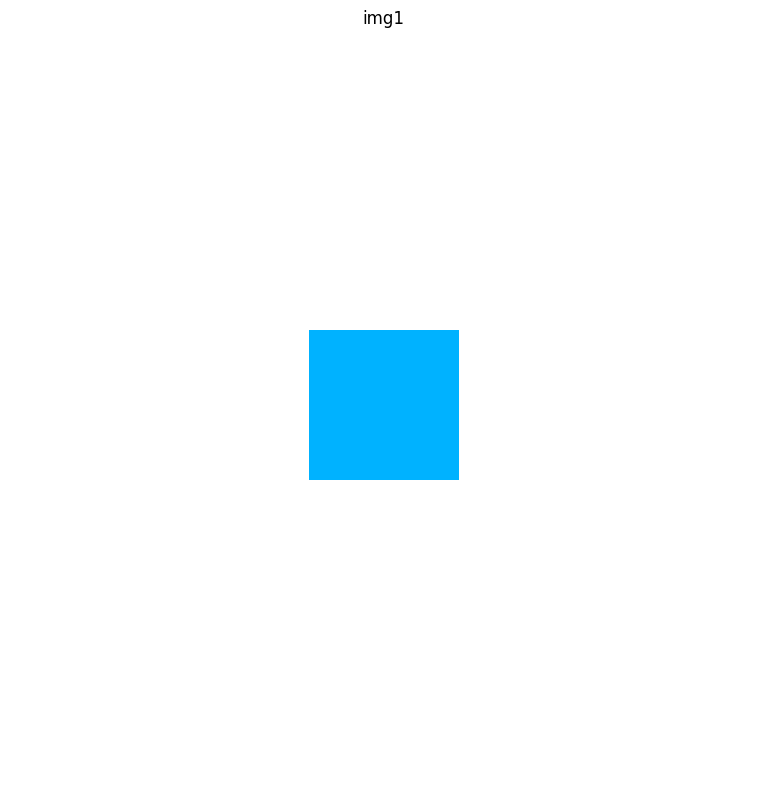

In [32]:
img.show(layer="img1")

# Crop and scale images

Images can be cropped and scaled using
`squidpy.im.ImageContainer.crop_corner` and
`squidpy.im.ImageContainer.crop_center`. See
`sphx_glr_auto_examples_image_compute_crops.py` for more details.


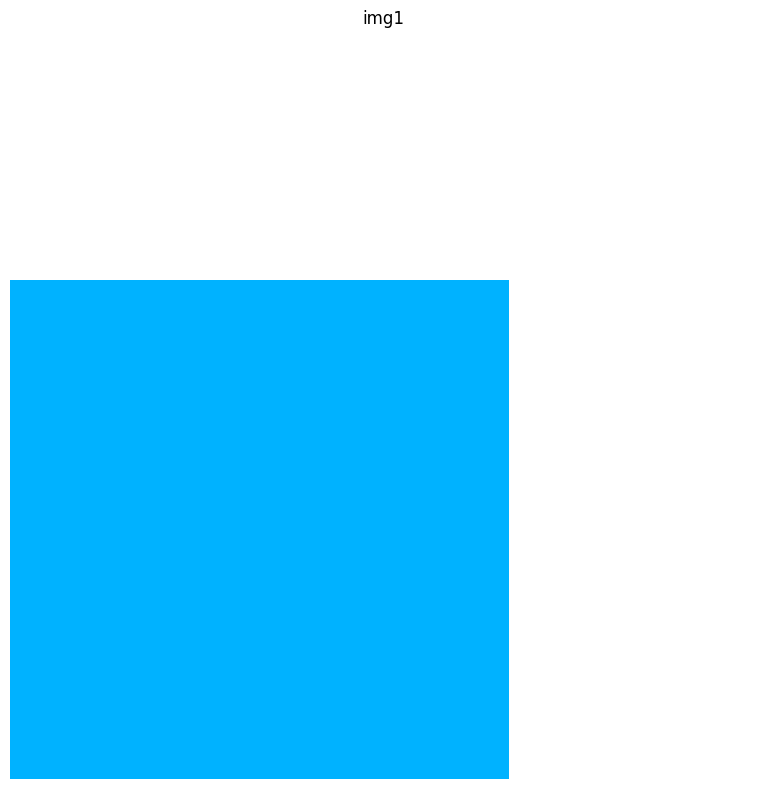

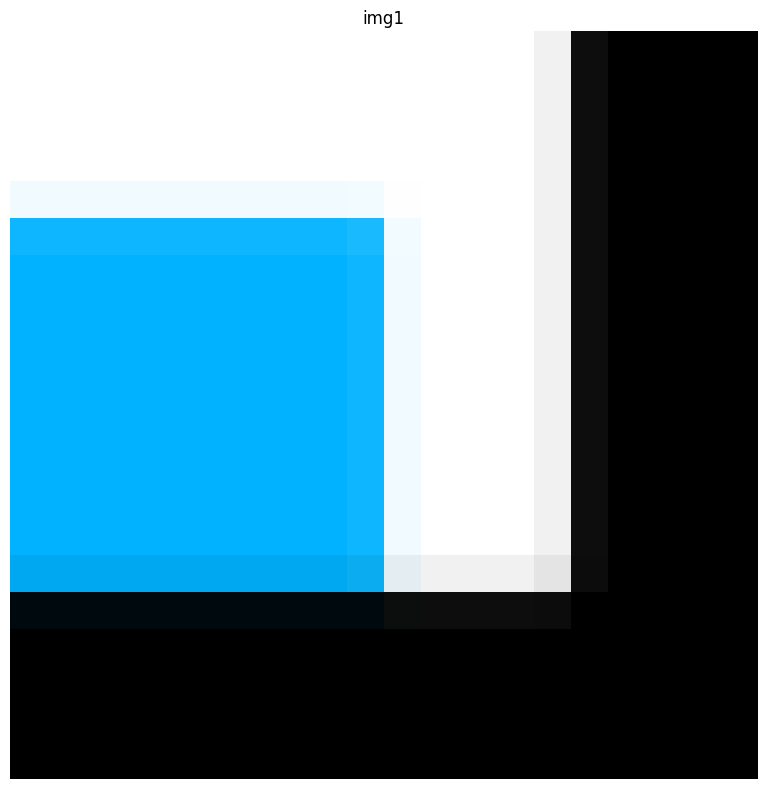

In [33]:
crop1 = img.crop_corner(30, 40, size=(30, 30), scale=1)
crop1.show(layer="img1")

crop2 = crop1.crop_corner(0, 0, size=(40, 40), scale=0.5)
crop2.show(layer="img1")

Internally, the [ImageContainer]{.title-ref} keeps track of the crop
coordinates in the dataset attributes. This enables mapping from cropped
[ImageContainers]{.title-ref} to observations in [adata]{.title-ref} for
interactive visualization and feature extraction.

In [34]:
print(crop1.data.attrs)
print(crop2.data.attrs)

{'coords': CropCoords(x0=40, y0=30, x1=70, y1=60), 'padding': CropPadding(x_pre=0, x_post=0, y_pre=0, y_post=0), 'scale': 1.0, 'mask_circle': False}
{'coords': CropCoords(x0=20.0, y0=15.0, x1=35.0, y1=30.0), 'padding': CropPadding(x_pre=0.0, x_post=5.0, y_pre=0.0, y_post=5.0), 'scale': 0.5, 'mask_circle': False}


Using `squidpy.im.ImageContainer.uncrop`, we can reconstruct the
original image. Even when chaining multiple calls to `crop`, `uncrop`
correctly places the crop in the image. Note that `uncrop` only undoes
the cropping, not the scaling.


In [35]:
img.shape

(100, 100)

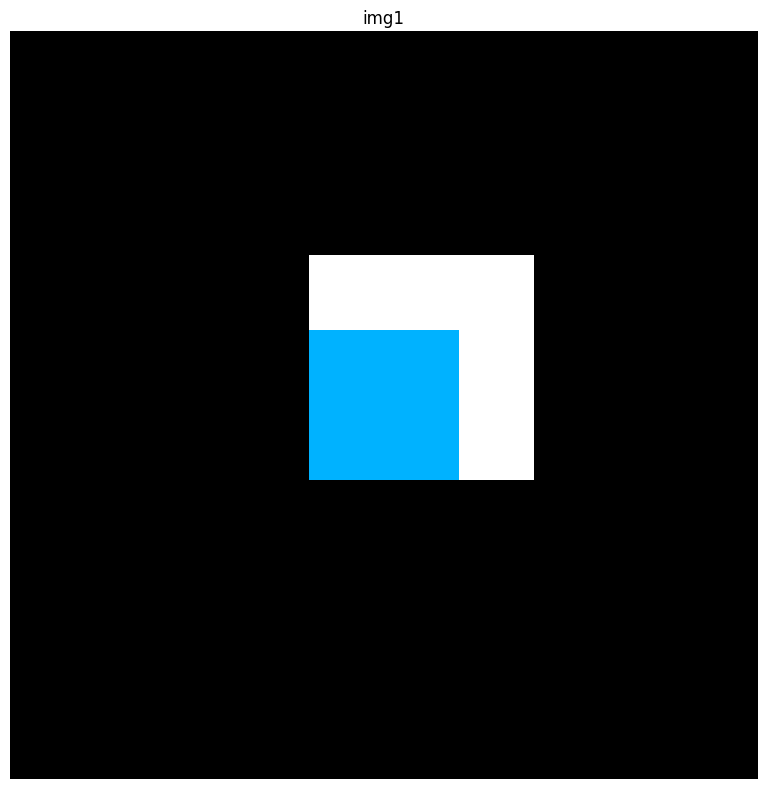

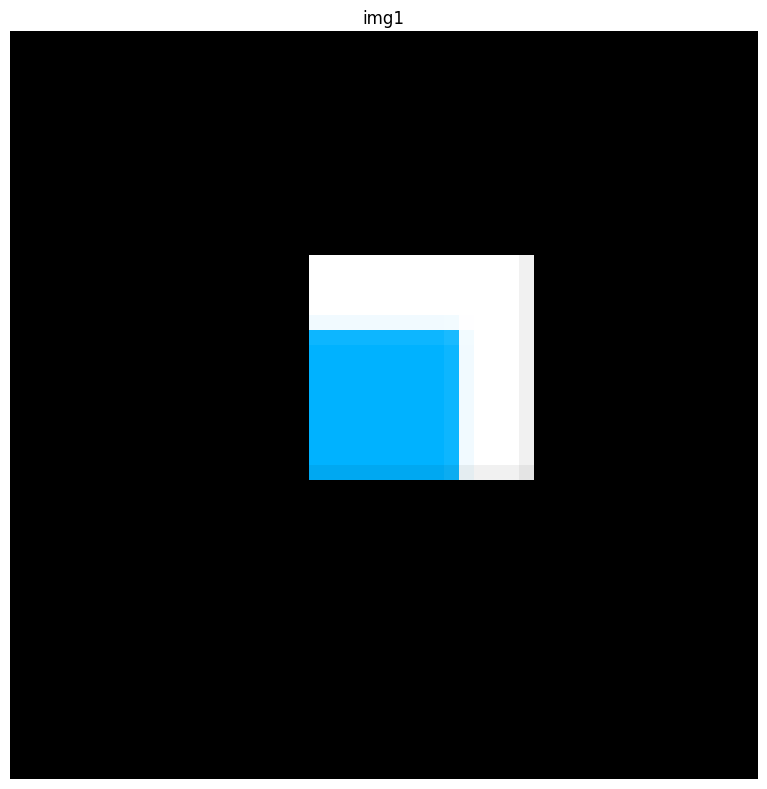

In [36]:
sq.im.ImageContainer.uncrop([crop1], shape=img.shape).show(layer="img1")
sq.im.ImageContainer.uncrop([crop2], shape=(50, 50)).show(layer="img1")

In [37]:
print(crop1.data.attrs)
print(crop2.data.attrs)

{'coords': CropCoords(x0=40, y0=30, x1=70, y1=60), 'padding': CropPadding(x_pre=0, x_post=0, y_pre=0, y_post=0), 'scale': 1.0, 'mask_circle': False}
{'coords': CropCoords(x0=20.0, y0=15.0, x1=35.0, y1=30.0), 'padding': CropPadding(x_pre=0.0, x_post=5.0, y_pre=0.0, y_post=5.0), 'scale': 0.5, 'mask_circle': False}


> IDF: `sq.im.ImageCotainer.uncrop()` only recovers the position information of the image within the original image. In other words, it places the values of the cropped image within a frame sized equally as the original image. The differential pixels are filled with "black/empty" cells.

After cropping the ImageContainer, you can subset the associated
[adata]{.title-ref} to the cropped image using
`squidpy.im.ImageContainer.subset`. See
`sphx_glr_auto_examples_image_compute_crops.py` for an example.


> IDF: other cropping and scaling examples

{'coords': CropCoords(x0=40, y0=40, x1=60, y1=60), 'padding': CropPadding(x_pre=0, x_post=0, y_pre=0, y_post=0), 'scale': 1.0, 'mask_circle': False}
(20, 20)
{'coords': CropCoords(x0=30, y0=30, x1=70, y1=70), 'padding': CropPadding(x_pre=0, x_post=0, y_pre=0, y_post=0), 'scale': 1.0, 'mask_circle': False}
(40, 40)
{'coords': CropCoords(x0=60, y0=60, x1=140, y1=140), 'padding': CropPadding(x_pre=0, x_post=0, y_pre=0, y_post=0), 'scale': 2.0, 'mask_circle': False}
(80, 80)
{'coords': CropCoords(x0=15.0, y0=15.0, x1=35.0, y1=35.0), 'padding': CropPadding(x_pre=0.0, x_post=0.0, y_pre=0.0, y_post=0.0), 'scale': 0.5, 'mask_circle': False}
(20, 20)


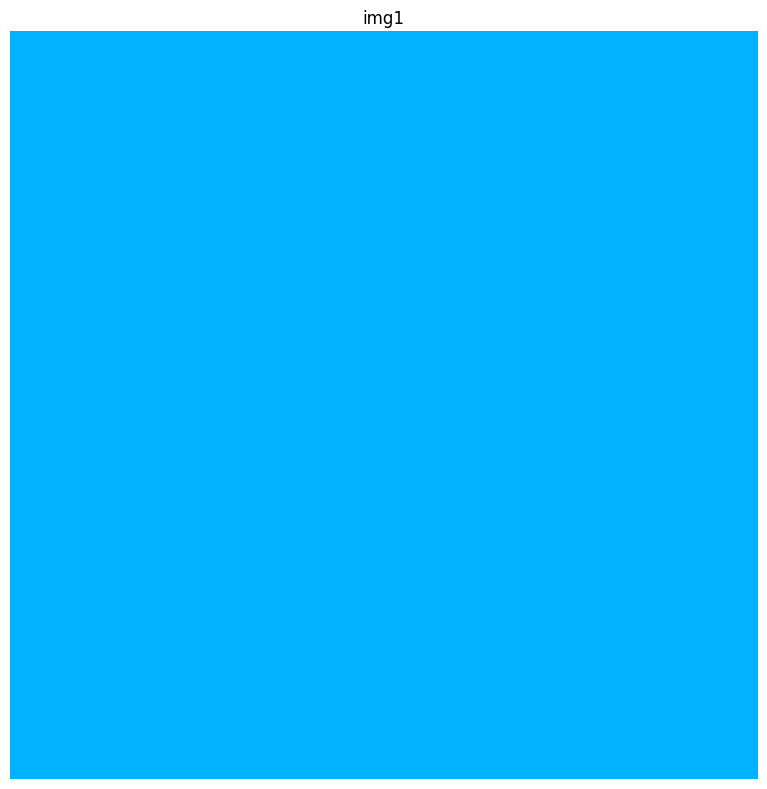

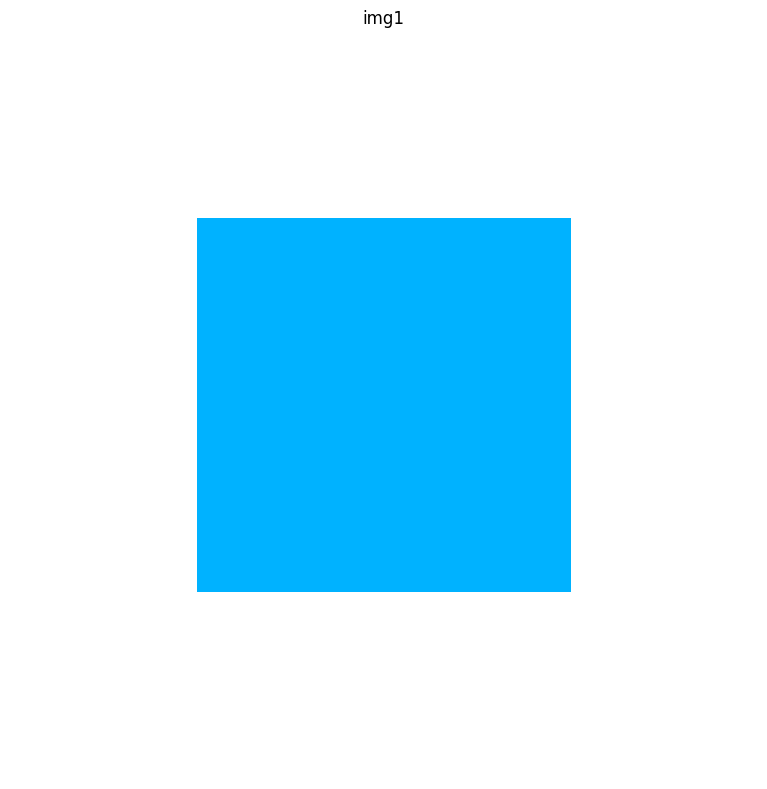

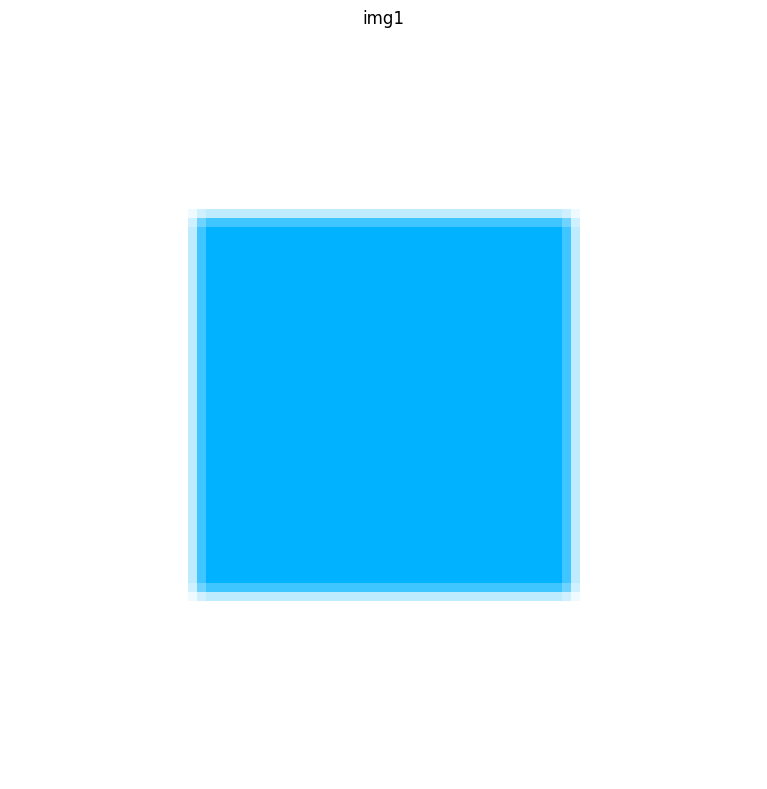

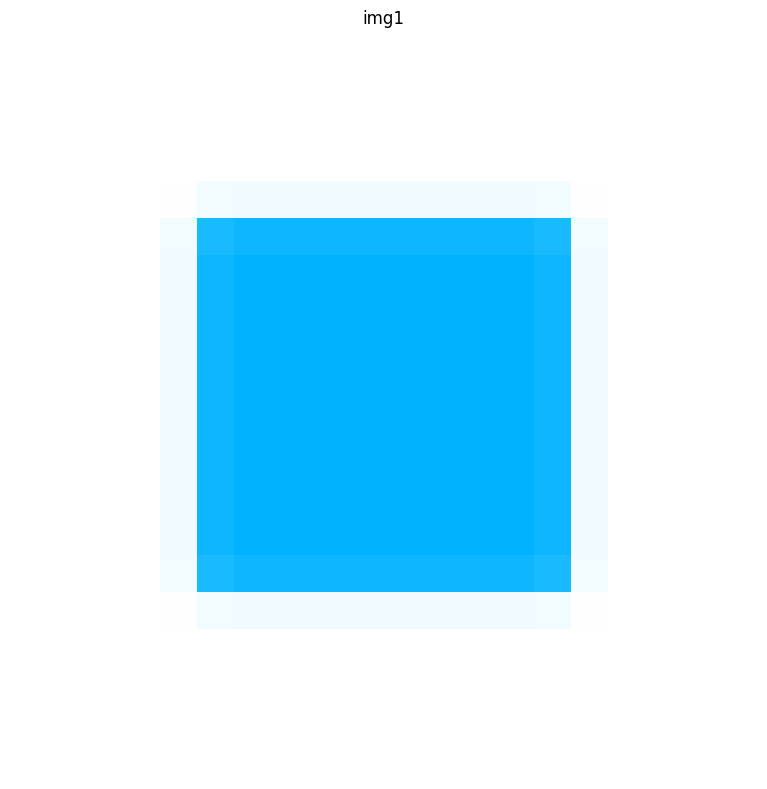

In [76]:
# Same size crop
crop3 = img.crop_corner(40, 40, size=20)
crop3.show(layer='img1')
print(crop3.data.attrs)
print(crop3.shape)

# Crop to be half-scaled
crop4 = img.crop_corner(30, 30, size=40)
crop4.show(layer='img1')
print(crop4.data.attrs)
print(crop4.shape)

# Double scaled crop
## Doubles the size and location of the image. Computes new pixels
crop5 = img.crop_corner(30, 30, size=40, scale=2)
crop5.show(layer='img1')
print(crop5.data.attrs)
print(crop5.shape)

# Half scaled crop
## Halves the size an dlocation of a image. Loses pixels.
crop6 = img.crop_corner(30, 30, size=40, scale=0.5)
crop6.show(layer='img1')
print(crop6.data.attrs)
print(crop6.shape)

{'coords': CropCoords(x0=40, y0=40, x1=60, y1=60), 'padding': CropPadding(x_pre=0, x_post=0, y_pre=0, y_post=0), 'scale': 1.0, 'mask_circle': False}
(20, 20)
{'coords': CropCoords(x0=40, y0=40, x1=60, y1=60), 'padding': CropPadding(x_pre=0, x_post=20, y_pre=0, y_post=20), 'scale': 1.0, 'mask_circle': False}
(40, 40)
{'coords': CropCoords(x0=80, y0=80, x1=160, y1=160), 'padding': CropPadding(x_pre=0, x_post=0, y_pre=0, y_post=0), 'scale': 2.0, 'mask_circle': False}
(80, 80)


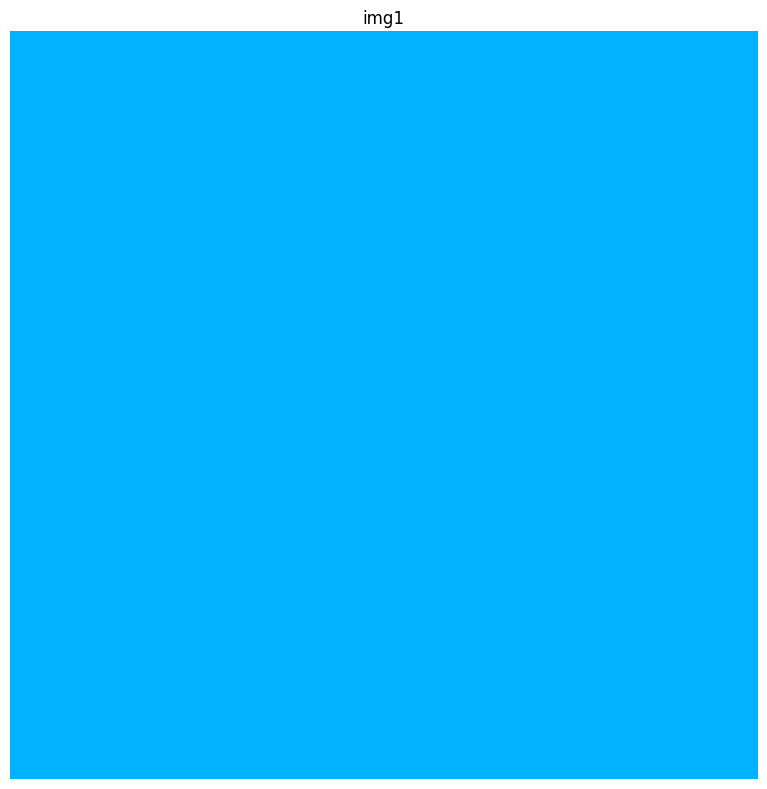

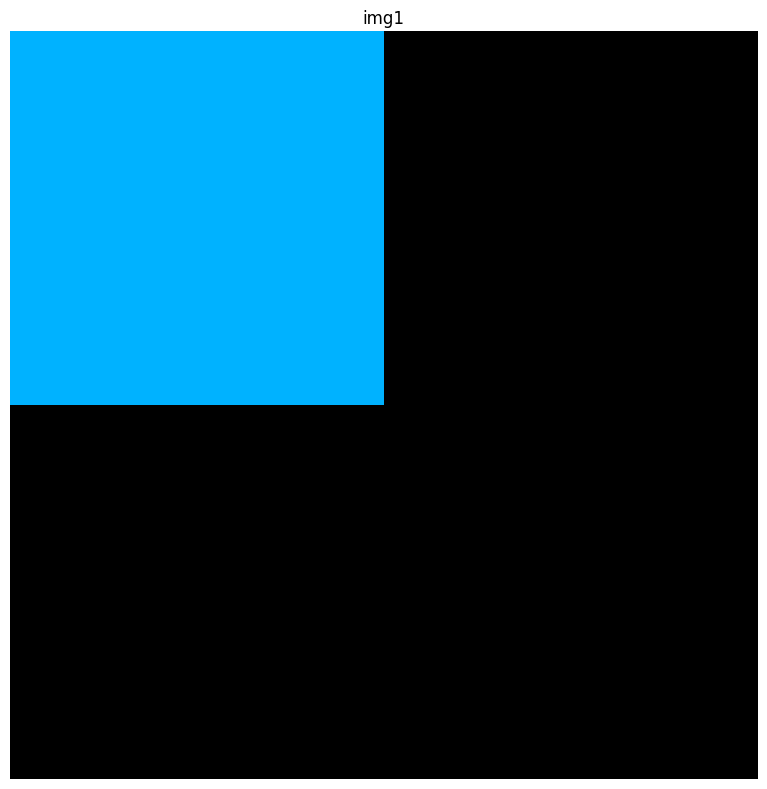

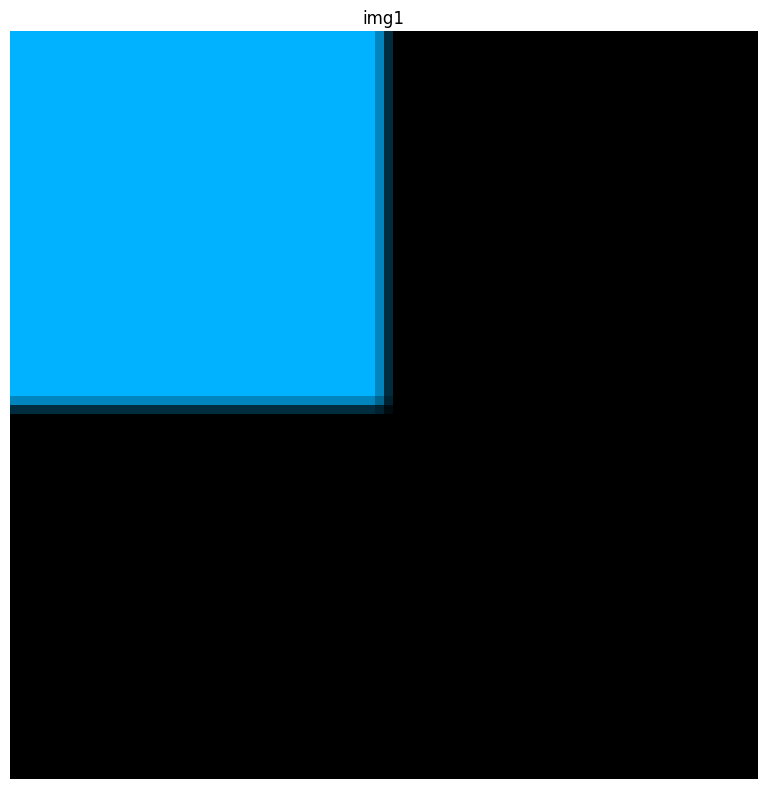

In [74]:
#
crop7 = img.crop_corner(40, 40, 20, scale=1)
crop7.show(layer='img1')
print(crop7.data.attrs)
print(crop7.shape)

# Boundary situation
crop8 = crop7.crop_corner(0, 0, 40, scale=1)
crop8.show(layer='img1')
print(crop8.data.attrs)
print(crop8.shape)

# Scaled boundary situation
crop9 = crop8.crop_corner(0, 0 ,size=crop8.shape, scale=2)
crop9.show(layer='img1')
print(crop9.data.attrs)
print(crop9.shape)

In [79]:
crop9['img1'][10, 10, :]

<xarray.DataArray 'img1' (z: 1, channels: 3)>
array([[0. , 0.7, 1. ]])
Coordinates:
  * z        (z) <U1 '0'
Dimensions without coordinates: channels

In [80]:
crop9['img1'][60, 60, :]

<xarray.DataArray 'img1' (z: 1, channels: 3)>
array([[0., 0., 0.]])
Coordinates:
  * z        (z) <U1 '0'
Dimensions without coordinates: channels

> IDF: Scaling induces image artifacts in geometric objects. Cropping outside boundaries forces the image to introduce padding as "black/empty cells" [0, 0, 0], which are downstream analysed as such.

# Processing images and extracting features

The main purpose of ImageContainer is to allow efficient image
processing, segmentation and features extraction.

For details on each of these steps, have a look a the following examples
using the high-level API:

> -   `sphx_glr_auto_examples_image_compute_process_hires.py` for
>     `sq.im.process`.
> -   `sphx_glr_auto_examples_image_compute_segment_fluo.py` for
>     `sq.im.segment`.
> -   `sphx_glr_auto_examples_image_compute_features.py` for
>     `sq.im.extract_features`.

These functions are build to be general and flexible. All of them allow
you to pass custom processing and feature extraction functions for easy
use of external packages with Squidpy.

For even more control, you can also use low-level functions provided by
\`ImageContainer\`:

> -   `sq.im.ImageContainer.apply` for custom processing functions that
>     should be applied to a specific image layer.
> -   `sq.im.ImageContainner.feature_custom` for extracting features.

There are two generators, that allow you to iterate over a sequence of
image crops and apply processing functions to smaller crops (e.g. to
allow parallelization or processing images that won\'t fit in memory:

> -   `sq.im.ImageContainer.generate_equal_crops`, for evenly
>     decomposing the image into equally sized crops.
> -   `sq.im.ImageContainer.generate_spot_crops`, for extracting image
>     crops for each observation in the associated [adata]{.title-ref}.


# Internal representation of images

Internally, the images are represented in a `xarray.Dataset`. You can
access this dataset using `img.data`.


In [38]:
img.data

<xarray.Dataset>
Dimensions:   (z: 1, y: 100, x: 100, channels: 3, channels_0: 1, channels_1: 1)
Coordinates:
  * z         (z) <U1 '0'
Dimensions without coordinates: y, x, channels, channels_0, channels_1
Data variables:
    img1      (y, x, z, channels) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    seg1      (y, x, z, channels_0) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    new-name  (y, x, z, channels_1) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    coords:       CropCoords(x0=0, y0=0, x1=0, y1=0)
    padding:      CropPadding(x_pre=0, x_post=0, y_pre=0, y_post=0)
    scale:        1.0
    mask_circle:  False

Whenever possible, images are represented as lazy `dask` arrays. This
allows lazy computations, which only load and compute the data when it
is required.

Let us load an on-disk image that is provided by the `squidpy.datasets`
module: By default, the [lazy]{.title-ref} argument is
[True]{.title-ref}, therefore resulting in a `dask.array.Array`.


In [39]:
img_on_disk = sq.datasets.visium_hne_image()
print(type(img_on_disk["image"].data))

<class 'dask.array.core.Array'>


We can use `squidpy.im.ImageContainer.compute` to force loading of the
data:


In [40]:
img_on_disk.compute()
print(type(img_on_disk["image"].data))

<class 'numpy.ndarray'>


ImageContainers can be saved and loaded from a *Zarr* store, using
`squidpy.im.ImageContainer.save` and `squidpy.im.ImageContainer.load`.


In [41]:
img_on_disk.save('img_on_disk.zarr')